In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set_style('dark')
warnings.filterwarnings("ignore")

## Input Data

In [2]:
data = pd.read_csv('final_complete_data.csv')

In [3]:
data.head(2)

,tconst,Score,NormalisedScore,Year,wordcount,totalemotion,Emotional Expression,Pos-Neg,Agressiveness,Anger,...,Sadness,Submission,Surprise,Trust,AFINN(-4&-5),Ero,titleType,primaryTitle,nconst,director
0,tt12389600,8.9,87.234043,1957,6759.0,2574.0,48.237495,41.224131,32.022145,32.019506,...,37.488846,15.337365,32.420845,34.706143,0.040480,10.181415,tvEpisode,12 Angry Men (1957),nm6020528,['Rob Boor']
1,tt0047478,8.6,80.851064,1954,3563.0,1617.0,68.210889,42.359376,19.030303,39.224978,...,40.912603,16.276388,23.094899,30.772156,19.278291,20.043469,movie,Seven Samurai,nm0000041,['Akira Kurosawa']


## Recommandations Based on Emotion type

In [4]:
def sort_by_emotion(emotion, count):
    emotional_data = data.sort_values(by=[emotion], ascending=False)
    print(emotional_data[['Score','primaryTitle','titleType',emotion, "director"]].head(count))
    emotional_data.head(count).plot(x = "primaryTitle", y = emotion, kind = "bar")
    plt.show()

    Score         primaryTitle  titleType  Agressiveness             director
23    8.5          City Lights      movie      47.370690  ['Charles Chaplin']
10    8.3              Amadeus      movie      40.008172     ['Milos Forman']
0     8.9  12 Angry Men (1957)  tvEpisode      32.022145         ['Rob Boor']
6     8.2         A Separation      short      29.772674         ['Yalan Hu']
68    8.2             Scarface      movie      26.732432   ['Brian De Palma']


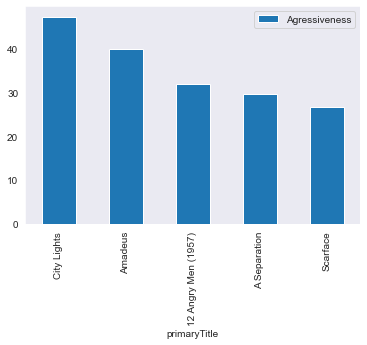

In [5]:
sort_by_emotion("Agressiveness", 5)

## Recommandations based on Emotion and Time period

In [6]:
def sort_by_year_emotion(emotion, year_start, year_end, limit):
    data_year = data[((data.Year >= year_start) & (data.Year <= year_end))].sort_values(by=['Year'], ascending=True)
    data_emotion = data_year.sort_values(by=[emotion], ascending=False)
    print(data_emotion[['Score','Year','primaryTitle','titleType',emotion, "director"]].head(limit))
    data_emotion.head(limit).plot(x = "primaryTitle", y = emotion, kind = "bar")

    Score  Year            primaryTitle titleType    Sadness  \
40    8.4  1988  Grave of the Fireflies     movie  38.449990   
21    8.4  1988         Cinema Paradiso     movie  32.270880   
36    8.3  1987       Full Metal Jacket     movie  31.240449   
39    8.6  1990              Goodfellas     movie  30.225191   
17    8.5  1985      Back to the Future     movie  22.169364   

                  director  
40       ['Isao Takahata']  
21  ['Giuseppe Tornatore']  
36     ['Stanley Kubrick']  
39     ['Martin Scorsese']  
17     ['Robert Zemeckis']  


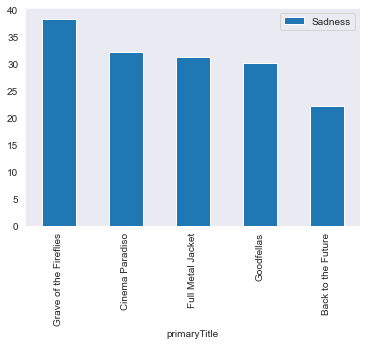

In [7]:
sort_by_year_emotion("Sadness", 1985,1990,5)

In [8]:
#hh = data.loc[data['primaryTitle']=='Seven Samurai']
#hh.plot('primaryTitle',['Emotional Expression','Agressiveness','Anger','Anticipation','Awe','Contempt','Disgust','Dissaproval','Fear',
#                    'Joy','Love','Negative','Optimism','Positive','Remorse','Trust','Pos-Neg','Sadness','Submission','Surprise'],kind = 'bar')

## Recommandations based on Director Name

In [9]:
def director(directorname):
    director_data = data.loc[data['director']==directorname]
    print(director_data[['Score','Year','primaryTitle','titleType', "director"]])


In [10]:
director('[\'Rob Boor\']')

   Score  Year                        primaryTitle  titleType      director
0    8.9  1957                 12 Angry Men (1957)  tvEpisode  ['Rob Boor']
2    8.3  1984  Once Upon A Time In America (1984)  tvEpisode  ['Rob Boor']


## Recommandations Based on Movie name.
finds the highest emotional score for the given movie and give results based on that emotion.

In [11]:
def by_title(title):
    data1 = data.loc[data['primaryTitle']== title]
    data1.drop(["NormalisedScore", "Year", "wordcount", "totalemotion", "Emotional Expression", "Pos-Neg", "tconst", "titleType","primaryTitle","nconst","director"], axis = 1, inplace = True)
    data2 = data1.idxmax(axis = 1)
    dd = list(data2)
    data_movie = data.sort_values(by=dd[0] , ascending=False)
    print(data_movie[['Score','Year','primaryTitle','titleType',dd[0]]].head())

In [12]:
by_title('Scarface')

    Score  Year        primaryTitle titleType      Trust
60    8.4  1957      Paths of Glory     movie  95.731117
48    8.2  1962  Lawrence of Arabia     movie  91.630259
5     8.3  1971  A Clockwork Orange     movie  86.796997
37    8.5  2000           Gladiator     movie  78.046007
23    8.5  1931         City Lights     movie  74.755836


In [13]:
#corrMatrix = data.corr()
#corrMatrix
#sns.heatmap(corrMatrix, annot=True)
#plt.show()